# EDA

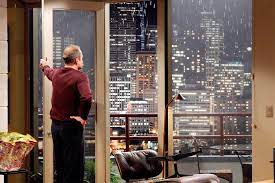

In [100]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)


#Client:
# Nicole Johnson
# Lively, maybe wants a house with a waterfront to have awesome barbecue parties
# Lively, maybe wants a bigger house to throw awesome house parties
# Middle price range, going to assume she means for the neighbourhood and not the county
# Right timing (within a year) I guess look at selling prices through the years and see cheapest month? For the neighbourhood
# She wants 2 bedrooms, 3 if it's cheap enough

#Insights: 
#  In the central neighbourhood there are no waterfront houses in cheapest 1500 and only one in cheapest 50%
#
#

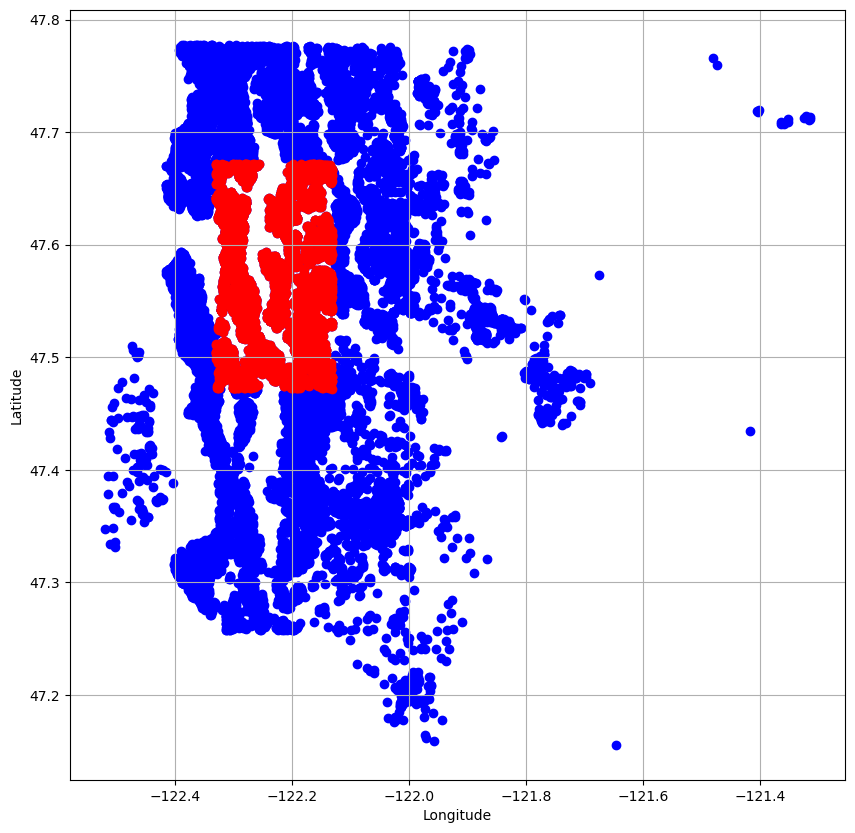

In [101]:
# All of the houses that sold put on something meant to represent a map of coordinates
df_one = pd.read_csv('data/data_details.csv')
df_two = pd.read_csv('data/data_sales.csv')

df_one
df_two = df_two.rename(columns={"date" : "sale_date"})
#df_weather['date'] = pd.to_datetime(df_weather['date'], format='%Y/%m/%d')
df_two["sale_date"] = pd.to_datetime(df_two["sale_date"], format="%Y-%m-%d")
df_one = df_one.rename(columns={"id" : "house_id"})
#df_two = df_two.rename(columns={"house_id" : "id"})
#df_two.sort_values(by="id")
df_one

merged_houses = df_one.merge(df_two, how='left', on='house_id')
merged_houses

sub_houses = merged_houses[["house_id", "yr_built", "yr_renovated", "lat", "long", "price", "sale_date", "sqft_basement"]]
sub_houses

sorted_sub = sub_houses.sort_values(by=["house_id", "sale_date"], ascending=[True,False])
sorted_sub

new_sub_houses = sorted_sub.drop_duplicates(subset="house_id", keep="first")
new_sub_houses

lat_min = new_sub_houses["lat"].min()
lat_min

lat_max = new_sub_houses["lat"].max()
lat_max

lon_min = new_sub_houses["long"].min()
lon_min

lon_max = new_sub_houses["long"].max()
lon_max

lat_med = new_sub_houses["lat"].median()
lat_med

lon_med = new_sub_houses["long"].median()
lon_med

lat_min
lon_min

condition = ((new_sub_houses["long"] > lon_med -0.1) & (new_sub_houses["long"] < lon_med + 0.1)) & ((new_sub_houses["lat"] > lat_med - 0.1) & (new_sub_houses["lat"] < lat_med + 0.1))
merg_con =((merged_houses["long"] > lon_med -0.1) & (merged_houses["long"] < lon_med + 0.1)) & ((merged_houses["lat"] > lat_med - 0.1) & (merged_houses["lat"] < lat_med + 0.1)) 
renov_con = (merged_houses["sqft_living"] != merged_houses["sqft_living15"])
cent_df = merged_houses[merg_con]
cent_df["yr_renovated"] = cent_df["yr_renovated"].fillna(0)
cent_df["waterfront"] = cent_df["waterfront"].fillna(0)
cent_df["yr_renovated"] = cent_df["yr_renovated"] / 10
cent_df["yr_renovated"] = cent_df["yr_renovated"].astype(int)
cent_df #Cleaned nans and bad years from the area we are interested in 


cent_df_tar = cent_df#[(cent_df['yr_built'] < 1950) & (cent_df['yr_built'] <= 2010)]
#print(cent_df_tar["price"].sort_values())# = cent_df_tar[cent_df["price"] != 0 ]

# Scatterplot them houses
# Too many dots too close together
# Assuming central neighbourhood is median of coordinates
condition = ((new_sub_houses["long"] > lon_med -0.1) & (new_sub_houses["long"] < lon_med + 0.1)) & ((new_sub_houses["lat"] > lat_med - 0.1) & (new_sub_houses["lat"] < lat_med + 0.1))
plt.figure(figsize=(10,10))
plt.scatter(new_sub_houses["long"], new_sub_houses["lat"], c="blue")
plt.scatter(new_sub_houses.loc[condition, "long"], new_sub_houses.loc[condition, "lat"], c="red")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

#how many houses share the same lat and long
#coord_df = new_sub_houses[["house_id", "long", "lat", "price"]]
#coord_df = coord_df.groupby(['lat', 'long'])['house_id'].count().reset_index(name='count')
#coord_df["count"].sort_values(ascending=False).head(20)

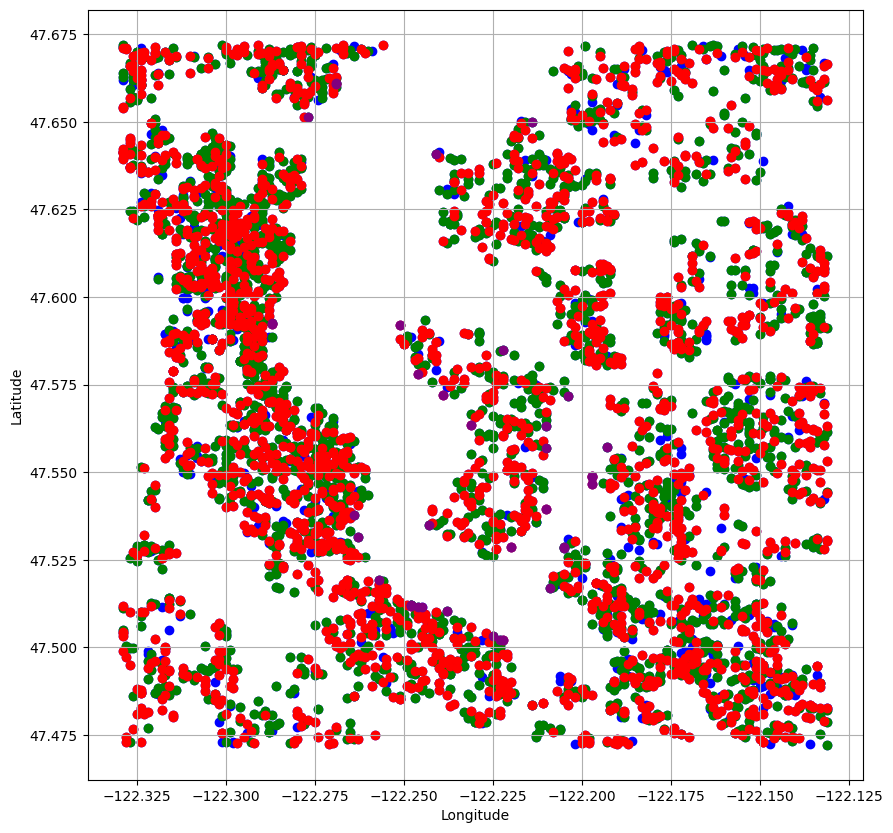

count      4761.000
mean     692138.082
std      544578.589
min       78000.000
25%      355000.000
50%      544300.000
75%      831000.000
max     7700000.000
Name: price, dtype: float64


In [159]:
# Living area compared to nearest 15: Bigger than average: Green, Average: Blue, Below average: Red, Purple: Waterfront
cent_df_tar["ppsqm"] = cent_df_tar["price"] / cent_df_tar["sqft_living"]
#Sort by cheapest to most expensive price per square foot
cent_df_tar = cent_df_tar.sort_values(by="ppsqm", ascending=True)
#Sort by most expensive to cheapest price per square foot
#cent_df_tar = cent_df_tar.sort_values(by="ppsqm", ascending=True)


scatter_houses = cent_df_tar#.head(2381)
#scatter_houses["ppsqm"].describe()
#print(scatter_houses["ppsqm"].describe())

plt.figure(figsize=(10,10))

#color default blue
plt.scatter(scatter_houses["long"], scatter_houses["lat"], c="blue")

#Color houses that are bigger than nearest 15 in green
plt.scatter(scatter_houses.loc[scatter_houses["sqft_living"] > scatter_houses["sqft_living15"], "long"], scatter_houses.loc[scatter_houses["sqft_living"] > scatter_houses["sqft_living15"], "lat"], c="green")

#Color houses that are smaller than nearest 15 in red
plt.scatter(scatter_houses.loc[scatter_houses["sqft_living"] < scatter_houses["sqft_living15"], "long"], scatter_houses.loc[scatter_houses["sqft_living"] < scatter_houses["sqft_living15"], "lat"], c="red")

#color waterfront purple 
plt.scatter(scatter_houses.loc[scatter_houses["waterfront"] == 1, "long"], scatter_houses.loc[scatter_houses["waterfront"] == 1, "lat"], c="purple")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
print(scatter_houses["price"].describe())

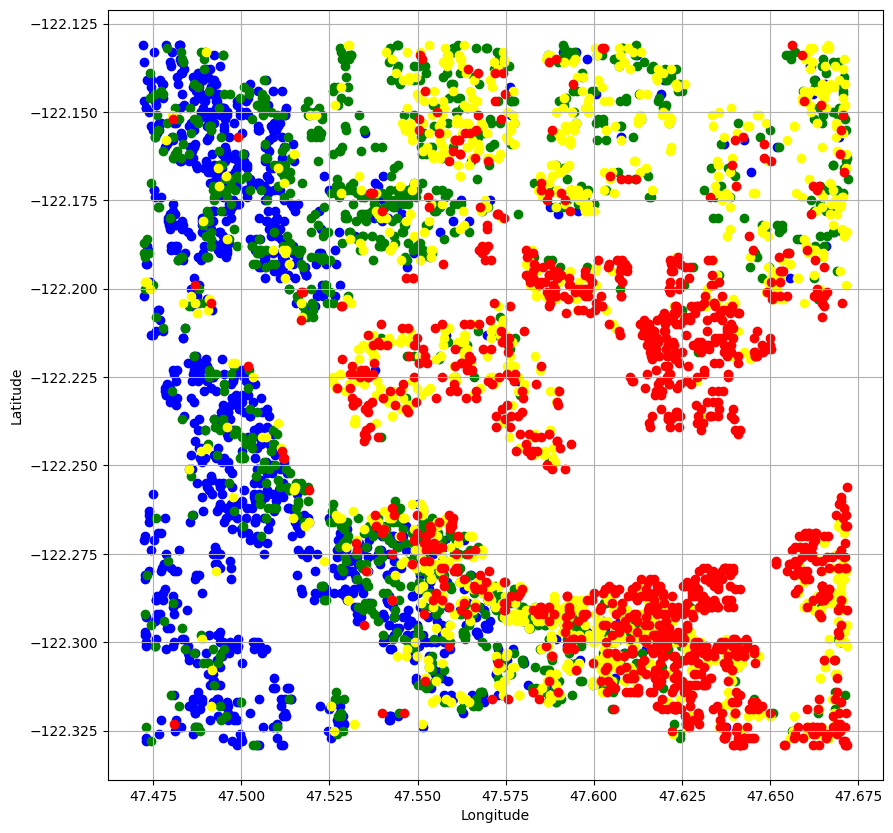

12714    257000.000
7676     250000.000
19792    160000.000
15313    100000.000
9038     178000.000
            ...    
12015   2580000.000
12498   1050000.000
10268   3100000.000
11038    903000.000
368     3400000.000
Name: price, Length: 4761, dtype: float64


In [103]:
#Price per square foot: CHEAPEST = BLUE < GREEN < YELLOW < RED = MOST EXPENSIVE
plt.figure(figsize=(10,10))
#color cheapest 25% blue ppsqm >= 87.713 & < 207.547
cheapestcon = (scatter_houses["ppsqm"] >= 87.713) & (scatter_houses["ppsqm"] < 207.547)
plt.scatter(scatter_houses.loc[cheapestcon, "lat"], scatter_houses.loc[cheapestcon, "long"], c="blue")
#color 25-50 green ppsqm >= 207.547 & < 289.474
cheapcon = (scatter_houses["ppsqm"] >= 207.547) & (scatter_houses["ppsqm"] < 289.474)
plt.scatter(scatter_houses.loc[cheapcon, "lat"], scatter_houses.loc[cheapcon, "long"], c="green")
#color 50-75 yellow >= 289.474 & < 380.403
medcon = (scatter_houses["ppsqm"] >= 289.474) & (scatter_houses["ppsqm"] < 380.403)
plt.scatter(scatter_houses.loc[medcon, "lat"], scatter_houses.loc[medcon, "long"], c="yellow")
#color 75-100 blue >= 798.122
richcon = (scatter_houses["ppsqm"] >= 380.403)
plt.scatter(scatter_houses.loc[richcon, "lat"], scatter_houses.loc[richcon, "long"], c="red")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

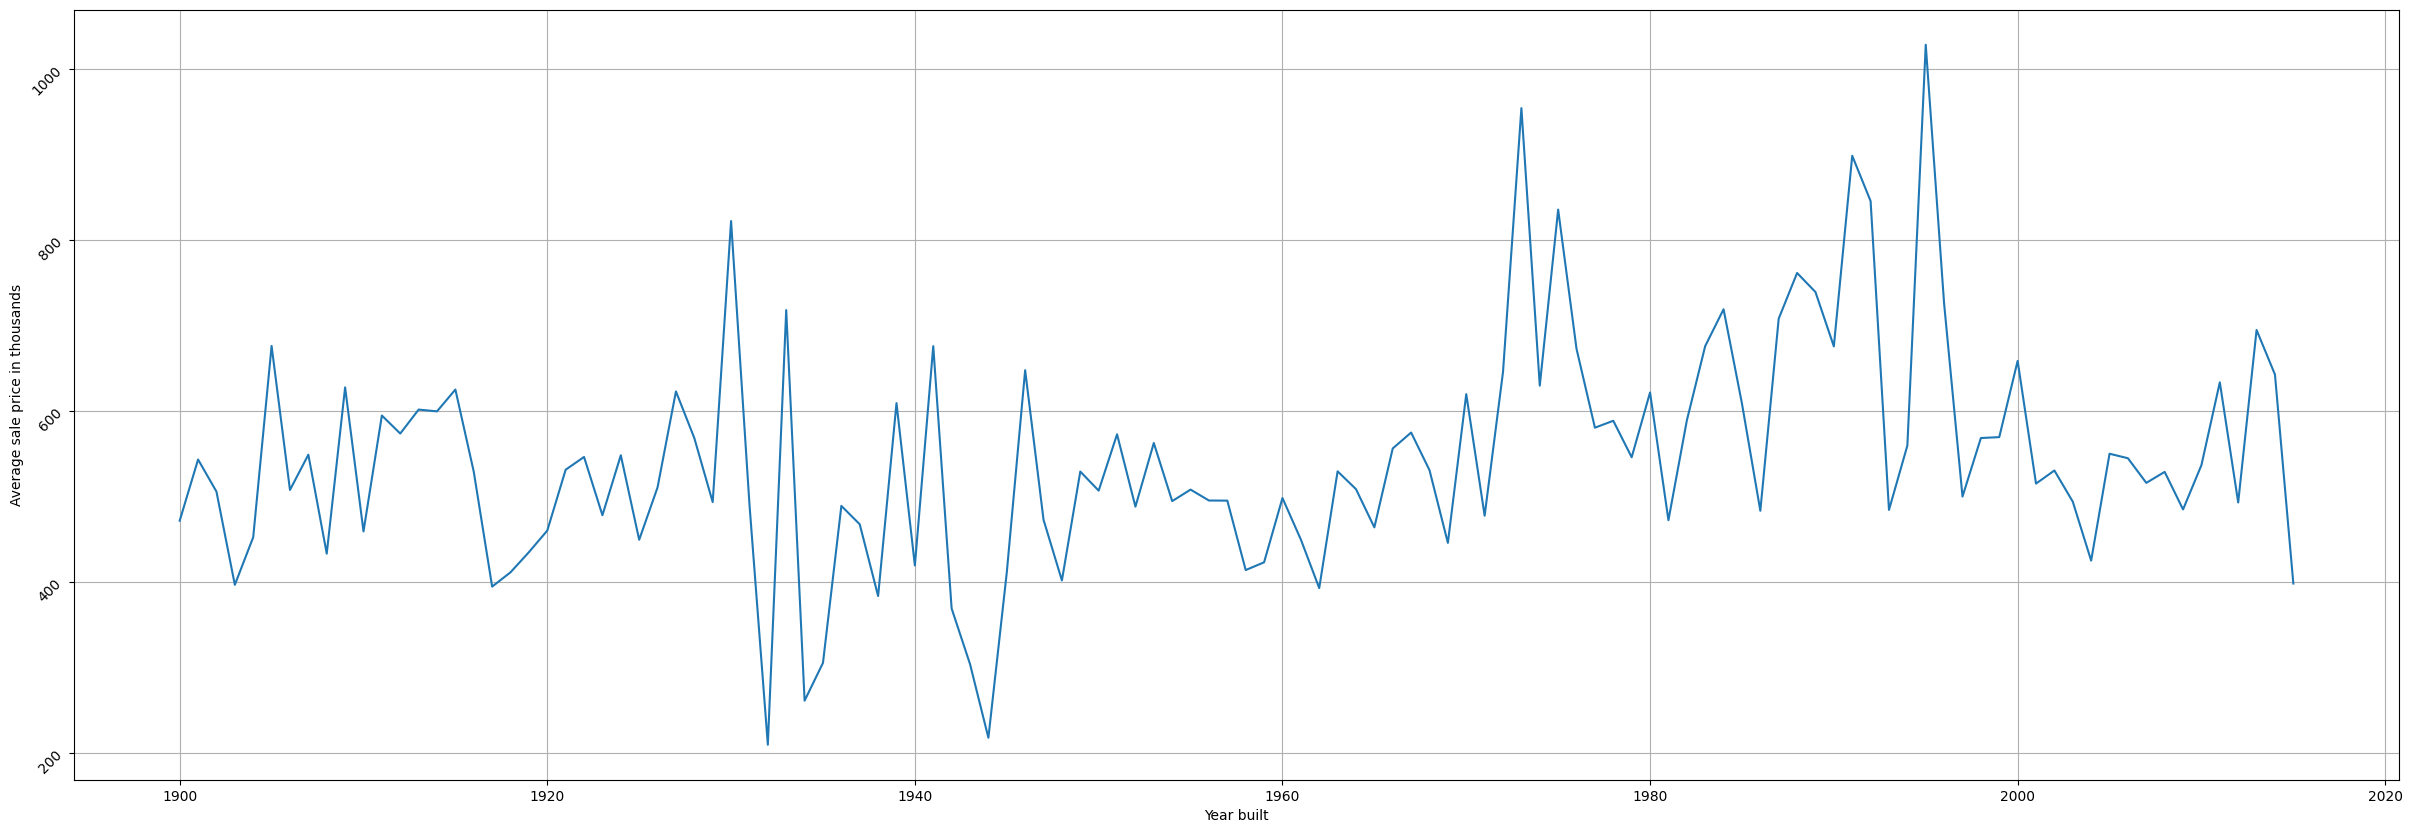

In [106]:
#Insight: Year effect on average house prices

avg_houses = scatter_houses[scatter_houses["bedrooms"].isin([2, 3])]
#scatter_houses["price"] = scatter_houses["price"].astype(int)
average_prices = avg_houses.groupby('yr_built')['price'].mean()
plt.figure(figsize=(30,10))
years = average_prices.index.to_numpy()
avg_prices = average_prices.to_numpy().astype(int) / 1000
plt.plot(years, avg_prices)
plt.xlabel("Year built")
plt.ylabel("Average sale price in thousands")
plt.yticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

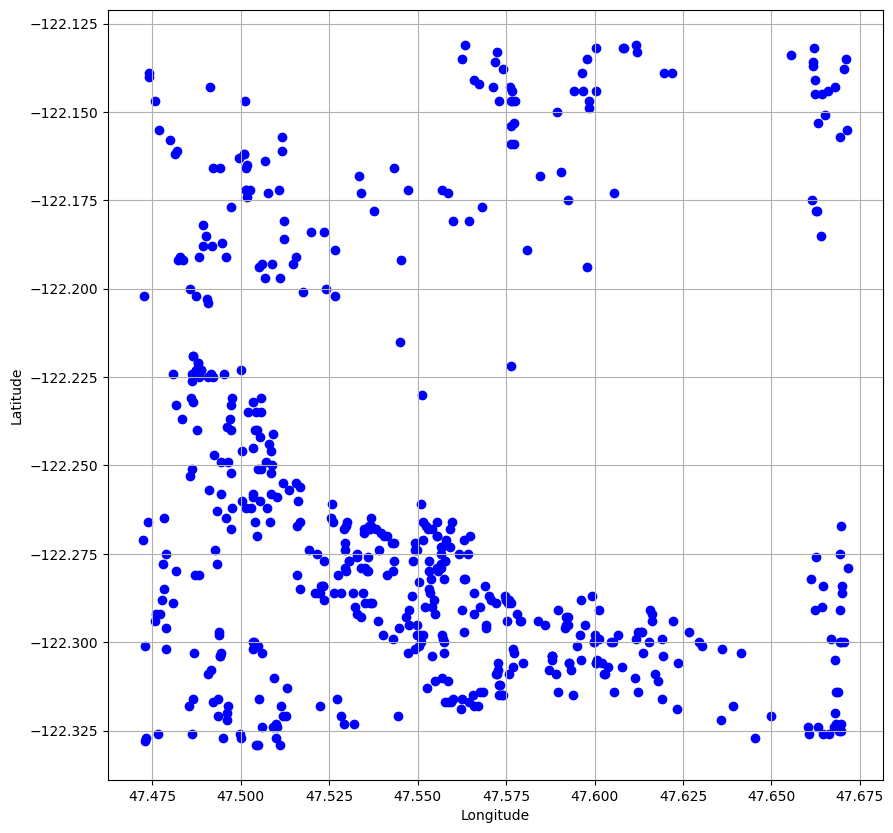

In [110]:
#Only show prices between 25% and 75%
scatter_houses["sqft_basement"] = scatter_houses["sqft_basement"].fillna(0)
plt.figure(figsize=(10,10))
cheapestcon = (scatter_houses["price"] >= 78000.000) & (scatter_houses["price"] <= 647625.000)
bathroom_con = (scatter_houses["bathrooms"] >= 1) & (scatter_houses["bathrooms"] < 2)
basement_con = (scatter_houses["sqft_basement"] > 0)
final_con = cheapestcon & bathroom_con & basement_con
plt.scatter(scatter_houses.loc[final_con, "lat"], scatter_houses.loc[final_con, "long"], c="blue")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

12714   -122.145
7676    -122.200
19792   -122.223
15313   -122.203
9038    -122.262
          ...   
43      -122.157
17827   -122.248
2282    -122.323
7670    -122.201
16239   -122.222
Name: long, Length: 1267, dtype: float64


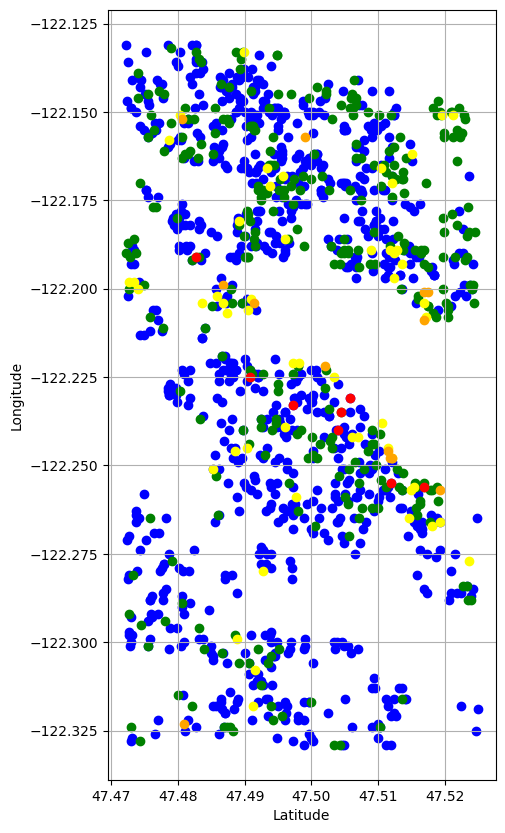

In [157]:
avg_houses = scatter_houses[scatter_houses["bedrooms"].isin([2, 3])]
annoying = avg_houses[(avg_houses["price"] > 355000) & (avg_houses["price"] < 831000)]
restrict_one = annoying[annoying["grade"] > 5]
restrict_two = restrict_one[restrict_one["sqft_basement"] > 0]
restrict_three = restrict_two[restrict_two["view"] > 1]
restrict_four = restrict_three[(restrict_three["bathrooms"] > 1) & (restrict_three["bathrooms"] < 2)]
restrict_four.sort_values("sqft_lot", ascending=False)
restrict_four = restrict_four[restrict_four["lat"] < 47.525]
scatter_houses = scatter_houses[scatter_houses["lat"] < 47.525]
print(scatter_houses["long"])

plt.figure(figsize=(5,10))
#color cheapest 25% blue ppsqm >= 87.713 & < 207.547
cheapestcon = (scatter_houses["ppsqm"] >= 87.713) & (scatter_houses["ppsqm"] < 207.547)
plt.scatter(scatter_houses.loc[cheapestcon, "lat"], scatter_houses.loc[cheapestcon, "long"], c="blue")
#color 25-50 green ppsqm >= 207.547 & < 289.474
cheapcon = (scatter_houses["ppsqm"] >= 207.547) & (scatter_houses["ppsqm"] < 289.474)
plt.scatter(scatter_houses.loc[cheapcon, "lat"], scatter_houses.loc[cheapcon, "long"], c="green")
#color 50-75 yellow >= 289.474 & < 380.403
medcon = (scatter_houses["ppsqm"] >= 289.474) & (scatter_houses["ppsqm"] < 380.403)
plt.scatter(scatter_houses.loc[medcon, "lat"], scatter_houses.loc[medcon, "long"], c="yellow")
#color 75-100 blue >= 798.122
richcon = (scatter_houses["ppsqm"] >= 380.403)
plt.scatter(scatter_houses.loc[richcon, "lat"], scatter_houses.loc[richcon, "long"], c="orange")

plt.scatter(restrict_four["lat"], restrict_four["long"], c="red")

plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.grid(True)
plt.show()
